### 1.

a) and b)

[1] -20

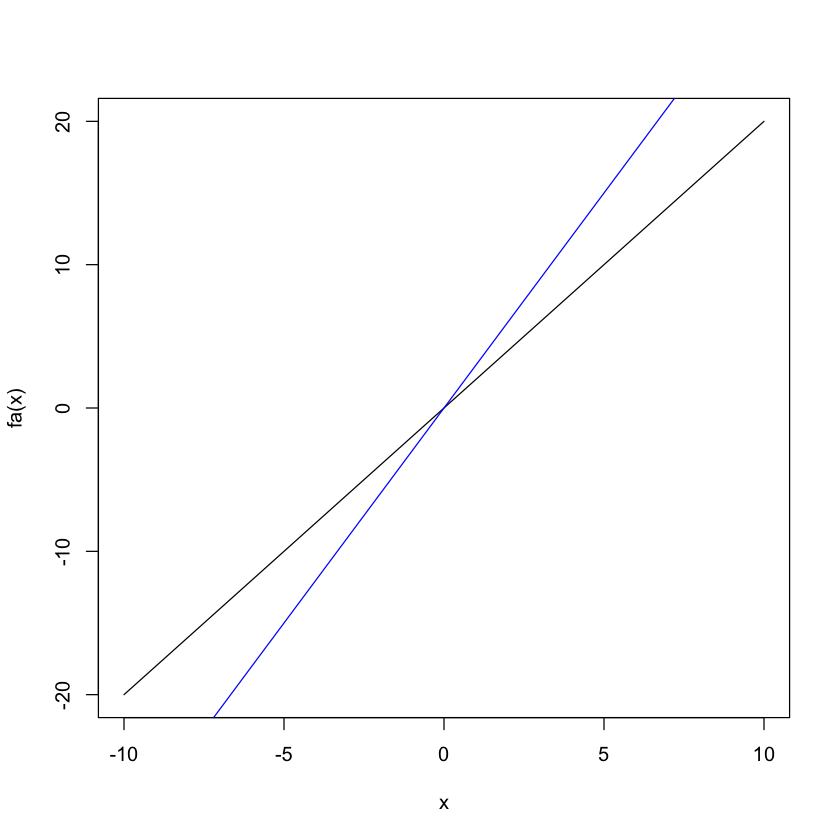

In [23]:
x = -10:10
fa = function(x) { 1 + (3*x) - (x + 1)}
fb = function(x) { -2 + x + 2 * (x + 1)}
plot(x, fa(x), type='l')
points(x, fb(x), type='l', col='blue')

### 4.


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "linear", cost = 10, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  19



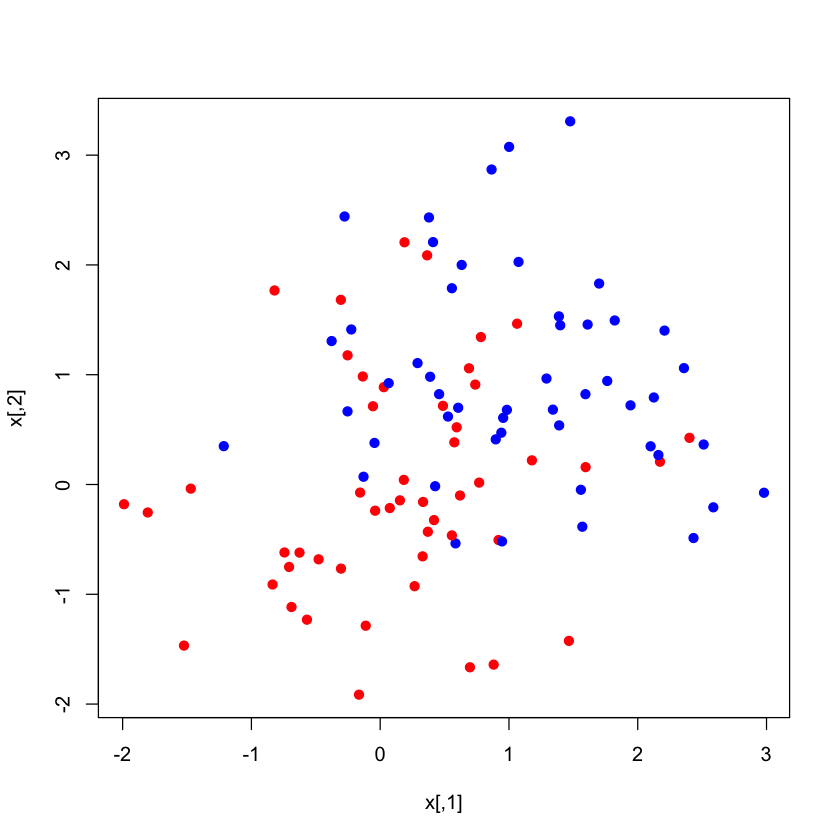


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.14 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.24  0.2458545
2  1e+00   0.5  0.16  0.1837873
3  1e+01   0.5  0.14  0.1646545
4  1e+02   0.5  0.32  0.1932184
5  1e+03   0.5  0.32  0.1398412
6  1e-01   1.0  0.34  0.3134042
7  1e+00   1.0  0.18  0.2201010
8  1e+01   1.0  0.24  0.2065591
9  1e+02   1.0  0.30  0.1699673
10 1e+03   1.0  0.34  0.1349897
11 1e-01   2.0  0.44  0.2633122
12 1e+00   2.0  0.20  0.2108185
13 1e+01   2.0  0.28  0.1932184
14 1e+02   2.0  0.32  0.1932184
15 1e+03   2.0  0.30  0.1699673
16 1e-01   3.0  0.44  0.2633122
17 1e+00   3.0  0.20  0.2108185
18 1e+01   3.0  0.24  0.2065591
19 1e+02   3.0  0.32  0.1932184
20 1e+03   3.0  0.32  0.1932184
21 1e-01   4.0  0.44  0.2633122
22 1e+00   4.0  0.20  0.2108185
23 1e+01   4.0  0.28  0.2347576
24 1e+02   4.0  0.28  0.1932184
25 1e+03   4.0  0.28  

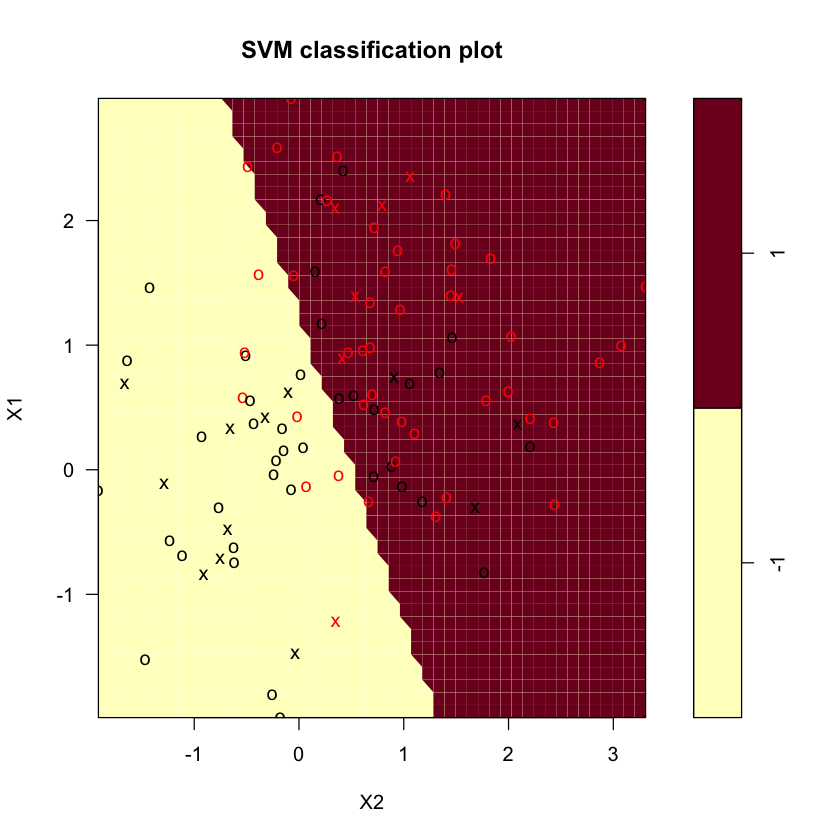

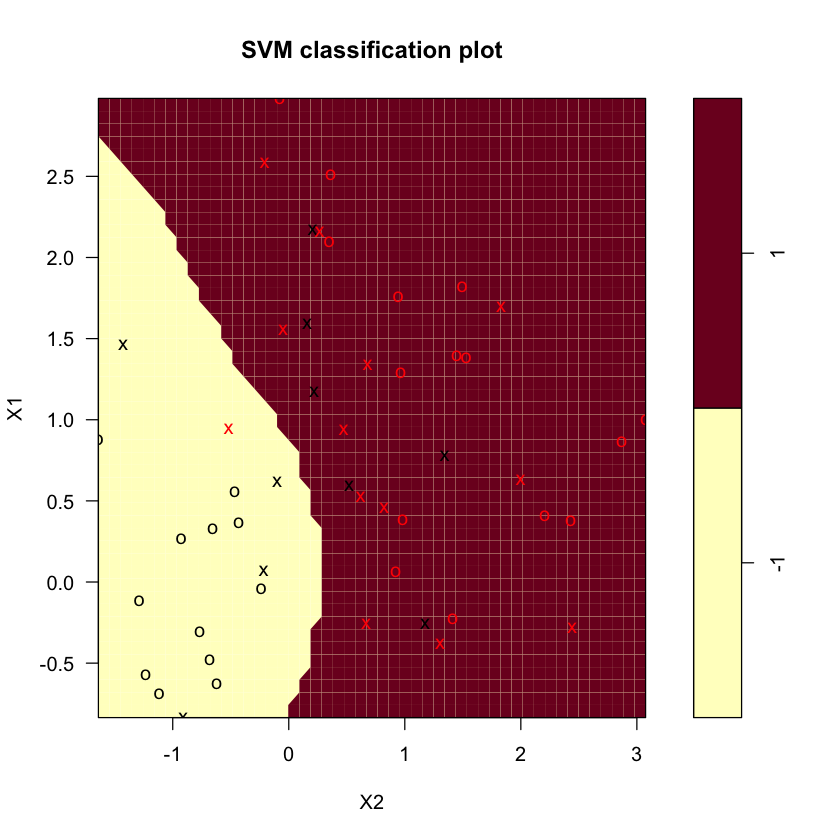

    pred
true -1  1
  -1 12 16
  1   3 19

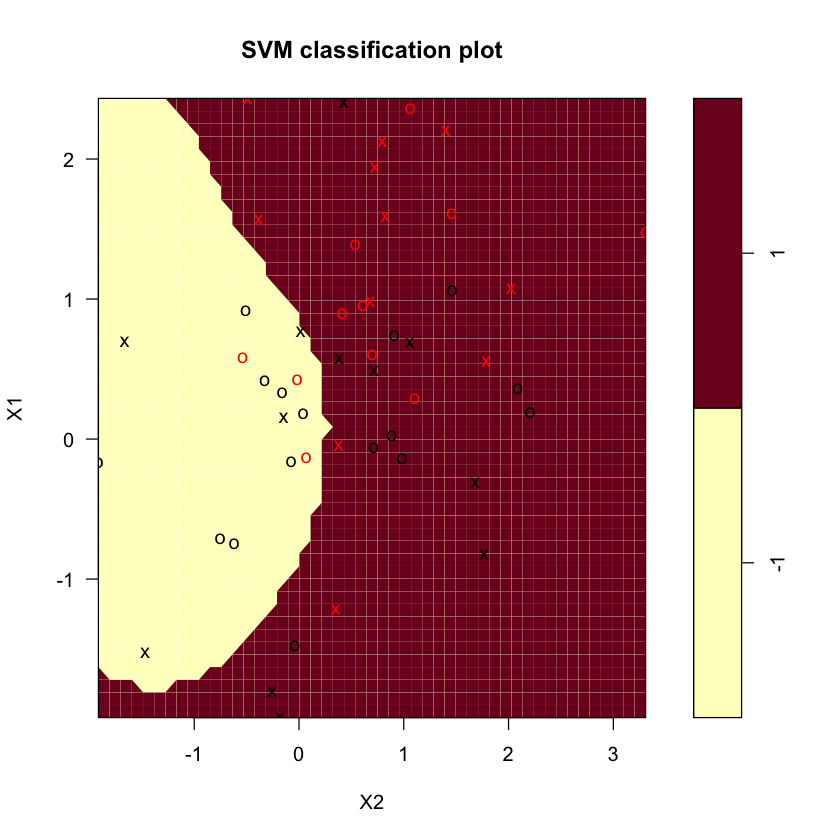

In [48]:
# install.packages('e1071')
set.seed(1)
x = matrix(rnorm(100*2),ncol=2)
train = sample(100, 50)
y = rep(c(-1,1), c(10,10))
x[y==1,] = x[y==1,]+1
plot(x,col = y + 3,pch=19)

library(e1071)

# linear svm (or svc)
dat = data.frame(x, y = as.factor(y))
svcfit = svm(y~., data=dat[train,], kernel='linear', cost=10, scale=FALSE)
print(svcfit)
plot(svcfit, dat)

# radial SVM
# tune
tune.out = tune(svm, y~., data=dat[train,], kernel="radial",
    ranges=list(cost=c(0.1,1,10,100,1000),
    gamma=c(0.5,1,2,3,4) ))

plot(tune.out$best.model, dat[train,])
plot(tune.out$best.model, dat[-train,])

table(true=dat[-train,"y"], pred=predict(tune.out$best.model, newdata=dat[-train ,]))